In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the Dataset
df = pd.read_csv('Investment Survey.csv')

df.head()

,Gender,Age,Working_professional,Annual_income,Mode_of_investment,Investment_per_month,Motivation_cause,Resources_used,Goal_for_investment,Duration_to_save(in_Years)
0,Male,19,0,0,"Banking - RD, FD",200,Family member,Family members/Friends,Wealth generation,10
1,Female,24,0,0,"Banking - RD, FD",1000,Social media/ Articles,Mobile applications,Wealth generation,3
2,Male,24,1,400000,"Stocks - Intraday, long term",5000,Social media/ Articles,News articles / Current affairs,Planning for finacial freedom after Retirement,10
3,Male,22,1,150000,Mutual Funds,2000,Agents/Investment brokers,News articles / Current affairs,Wealth generation,10
4,Male,25,1,250000,Mutual Funds,2000,Self Interest,Books,Wealth generation,15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Gender                      100 non-null    object
 1   Age                         100 non-null    int64 
 2   Working_professional        100 non-null    int64 
 3   Annual_income               100 non-null    int64 
 4   Mode_of_investment          100 non-null    object
 5   Investment_per_month        100 non-null    object
 6   Motivation_cause            100 non-null    object
 7   Resources_used              100 non-null    object
 8   Goal_for_investment         100 non-null    object
 9   Duration_to_save(in_Years)  100 non-null    object
dtypes: int64(3), object(7)
memory usage: 7.9+ KB


# Data Cleaning

In [4]:
df.isnull().sum()

Gender                        0
Age                           0
Working_professional          0
Annual_income                 0
Mode_of_investment            0
Investment_per_month          0
Motivation_cause              0
Resources_used                0
Goal_for_investment           0
Duration_to_save(in_Years)    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [9]:
#Change 'Duration_to_save(in_Years)' datatype from object to int32
df['Duration_to_save(in_Years)'] = pd.to_numeric(df['Duration_to_save(in_Years)'], errors='coerce').astype('Int32')

#Change 'Investment_per_month' datatype from object to int32
df['Investment_per_month'] = pd.to_numeric(df['Investment_per_month'], errors='coerce').astype('Int32')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Gender                      100 non-null    object
 1   Age                         100 non-null    int64 
 2   Working_professional        100 non-null    int64 
 3   Annual_income               100 non-null    int64 
 4   Mode_of_investment          100 non-null    object
 5   Investment_per_month        97 non-null     Int32 
 6   Motivation_cause            100 non-null    object
 7   Resources_used              100 non-null    object
 8   Goal_for_investment         100 non-null    object
 9   Duration_to_save(in_Years)  99 non-null     Int32 
dtypes: Int32(2), int64(3), object(5)
memory usage: 7.4+ KB


# Data Analysis

In [11]:
#1. Find out all the mode of investment where Gender is "Male".
df[df['Gender'].str.strip().str.lower() == 'male'][['Gender', 'Mode_of_investment']].head(10)

,Gender,Mode_of_investment
0,Male,"Banking - RD, FD"
2,Male,"Stocks - Intraday, long term"
3,Male,Mutual Funds
4,Male,Mutual Funds
5,Male,Crypto currency
6,Male,Not prepared
9,Male,"Stocks - Intraday, long term"
12,Male,Mutual Funds
13,Male,"Stocks - Intraday, long term"
15,Male,"Stocks - Intraday, long term"


In [12]:
#2. Find out the total number of male and female.
df['Gender'].value_counts()

Male      64
Female    36
Name: Gender, dtype: int64

In [13]:
#3. Find out all the Motivation_cause, Resources_used  where sex is "Female".
df[df['Gender'].str.strip().str.lower() == 'female'][['Gender' , 'Motivation_cause' , 'Resources_used']].head(10)

,Gender,Motivation_cause,Resources_used
1,Female,Social media/ Articles,Mobile applications
7,Female,Family member,Family members/Friends
8,Female,Family member,Family members/Friends
10,Female,Family member,Family members/Friends
11,Female,Self,Family members/Friends
14,Female,Through Bank,Books
18,Female,Family member,Family members/Friends
28,Female,Agents/Investment brokers,Family members/Friends
31,Female,Friends,Family members/Friends
32,Female,Family member,Family members/Friends


In [14]:
#4. Find out the total companies where products submitted via 'Web'.
#Total Companies where products submitted via 'Web'.
investment_goals = df[df['Goal_for_investment'] == 'Wealth generation']['Gender'].nunique()

print(f"Total Genders where Investment Goals is 'Wealth generation': {investment_goals}")

Total Genders where Investment Goals is 'Wealth generation': 2


# Data Visualization

In [39]:
df.columns

Index(['Gender', 'Age', 'Working_professional', 'Annual_income',
       'Mode_of_investment', 'Investment_per_month', 'Motivation_cause',
       'Resources_used', 'Goal_for_investment', 'Duration_to_save(in_Years)'],
      dtype='object')

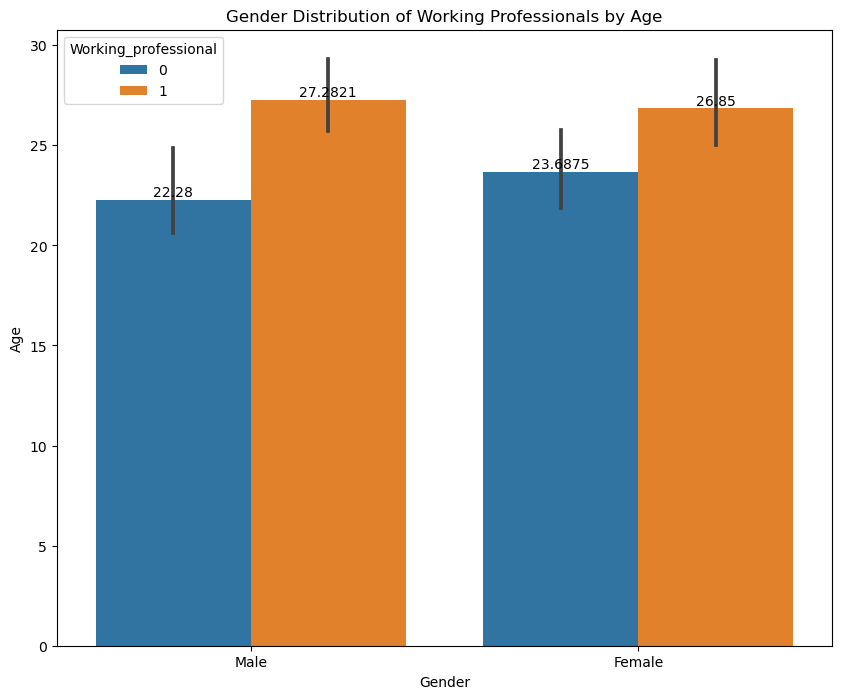

In [19]:
#1. Find the Gender Distribution of Working Professionals by Age.
plt.figure(figsize = (10,8))
ax = sns.barplot(x = 'Gender' , y = 'Age' , data = df , hue = 'Working_professional')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Gender Distribution of Working Professionals by Age')
plt.show()

In the above graph, the Male has the highest Working Professionals By Age than Female.

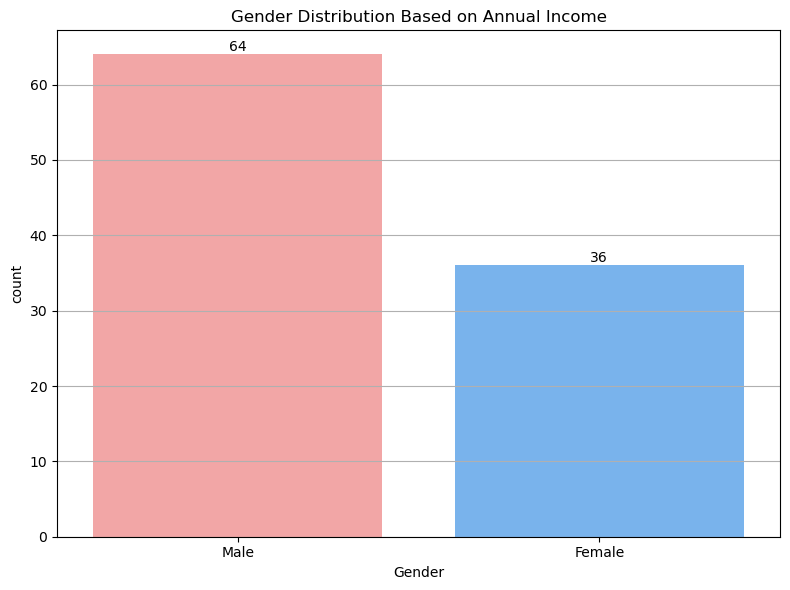

In [71]:
#2. Find out the highest annual income from both the genders.
dfm = df[['Annual_income', 'Gender']].dropna()

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=dfm, x='Gender', palette=['#ff9999', '#66b3ff'])
ax.bar_label(ax.containers[0])
plt.title('Gender Distribution Based on Annual Income')
plt.xlabel('Gender')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In the above graph, the Male has the highest annual income than Female.

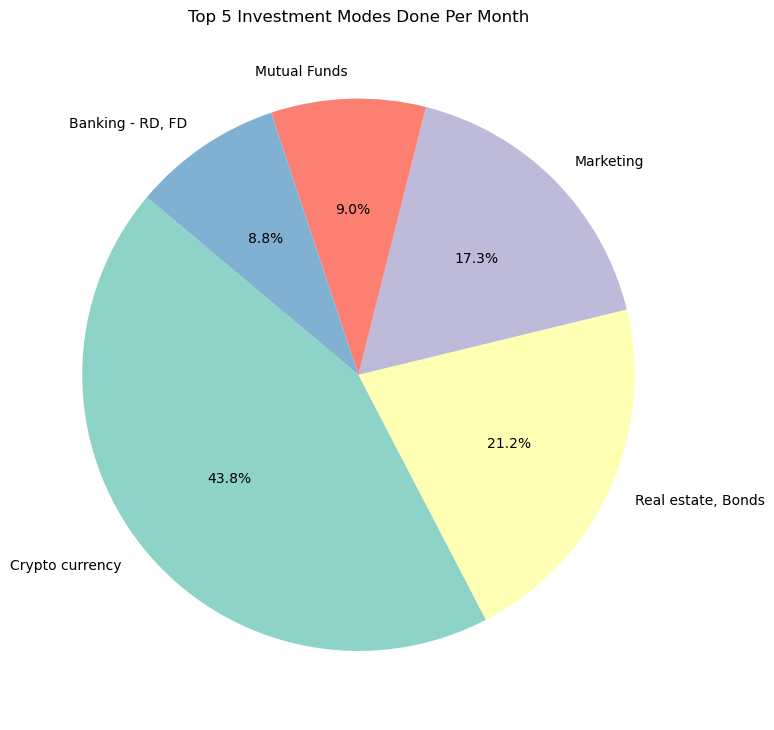

In [91]:
#3. Print the results of most mode of investment done per month by both the genders.
top5_modes = df.groupby('Mode_of_investment')['Investment_per_month'].mean().sort_values(ascending=False).head(5)
top5_df = df[df['Mode_of_investment'].isin(top5_modes)]

plt.figure(figsize=(8, 8))
plt.pie(top5_modes, labels=top5_modes.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Top 5 Investment Modes Done Per Month')
plt.tight_layout()
plt.show()

In the above pie chart, the most mode of investment done per month by both the genders is Cryptocurrency.

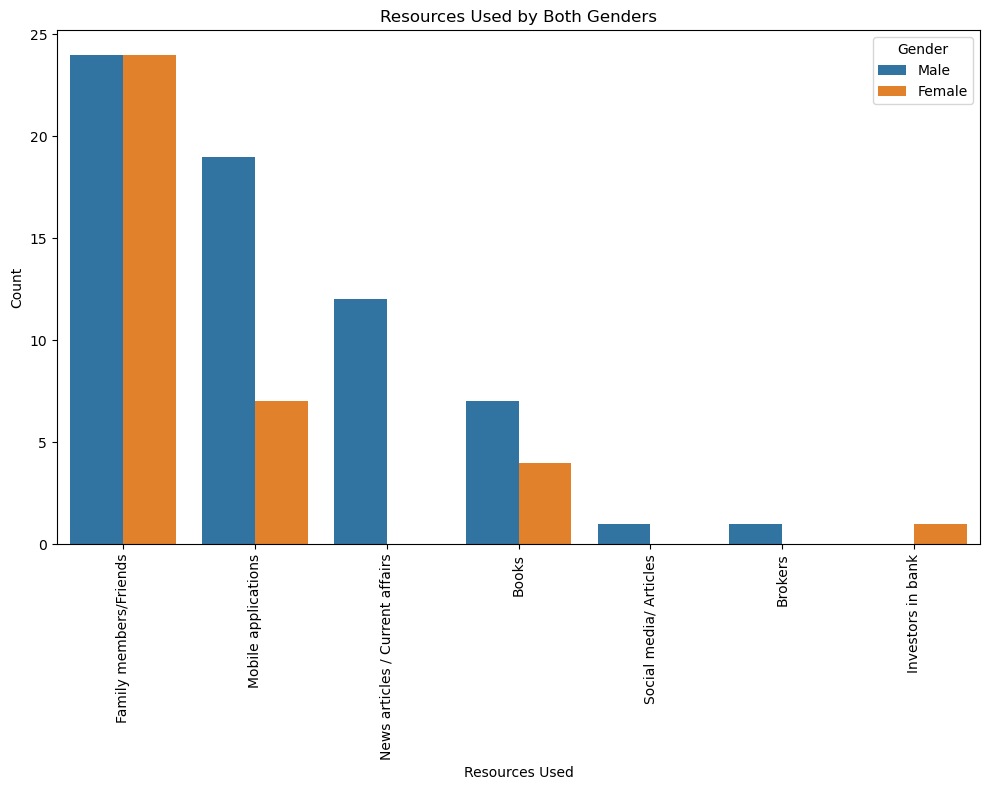

In [90]:
#4. Find out the most resources used by both the genders.
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Resources_used', hue='Gender')
plt.title('Resources Used by Both Genders')
plt.xlabel('Resources Used')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In the above graph, both mostly used resources by both the genders is Family members/Friends.

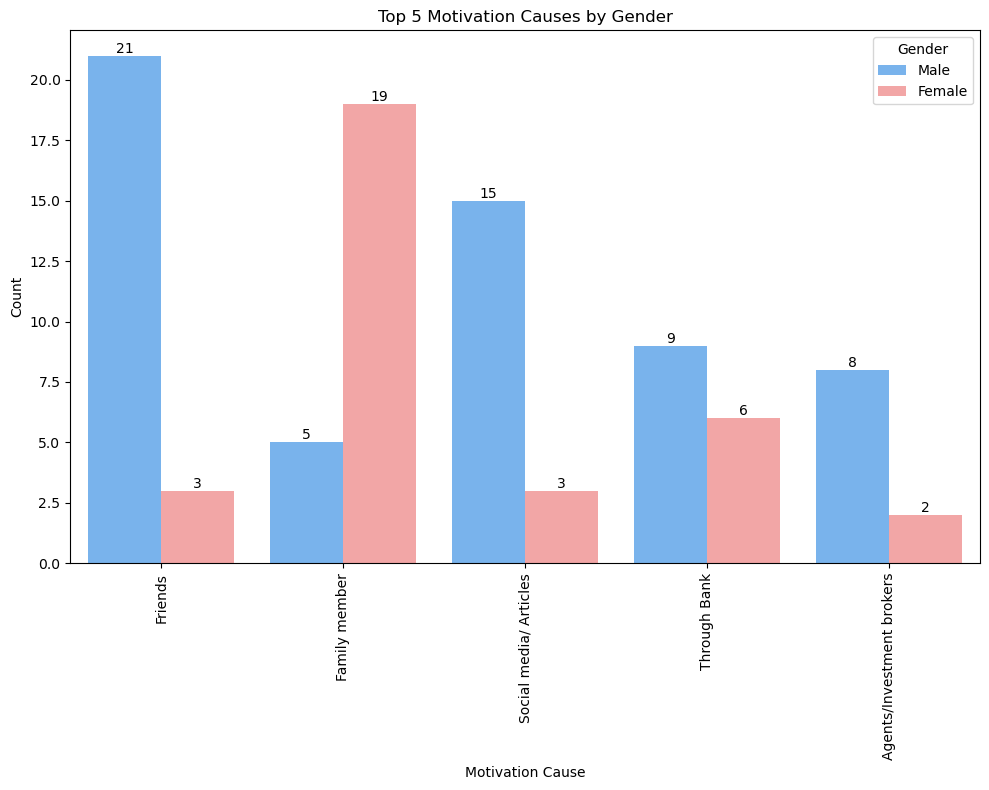

In [87]:
#5. Find out the Top 5 motivation causes reasons from both the genders.
top5 = df['Motivation_cause'].value_counts().head(5).index
motivation_counts = df[df['Motivation_cause'].isin(top5)].value_counts(['Motivation_cause', 'Gender']).reset_index(name='Count')

plt.figure(figsize=(10, 8))
ax = sns.barplot(data=motivation_counts, x='Motivation_cause', y='Count', hue='Gender', palette=['#66b3ff', '#ff9999'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Top 5 Motivation Causes by Gender')
plt.xlabel('Motivation Cause')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In the above graph, the major motivation cause from both the genders is Friends and Family Members.

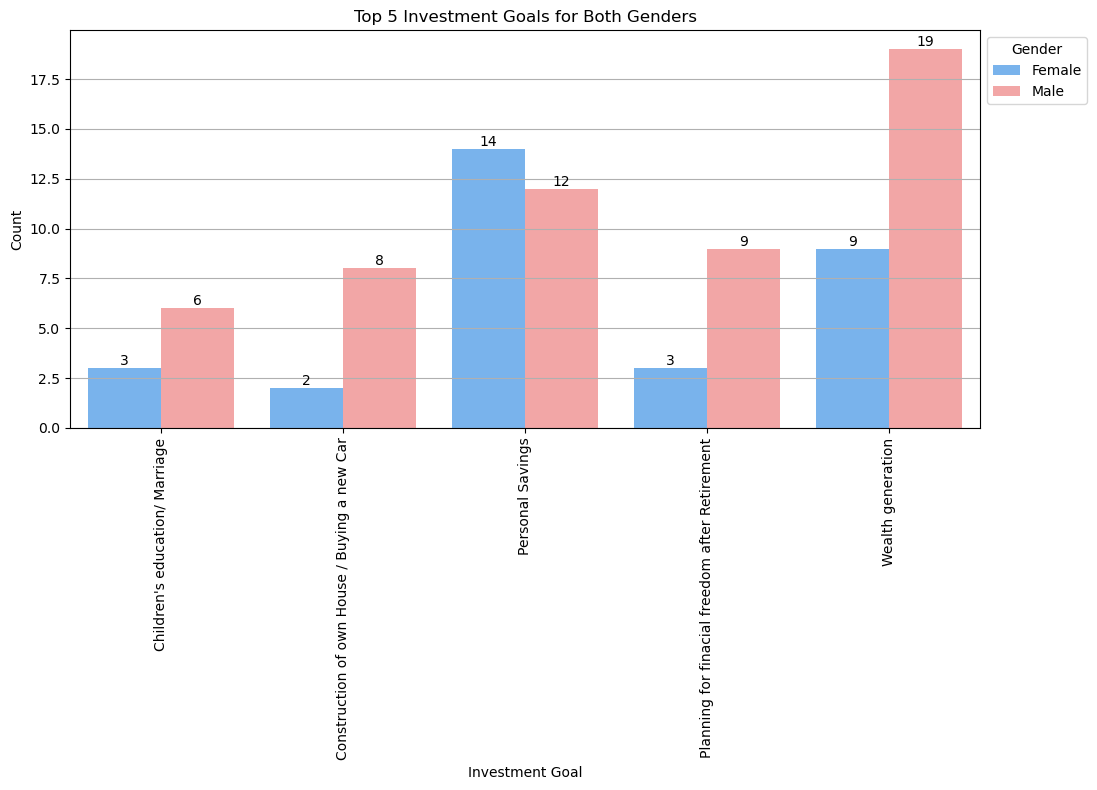

In [83]:
#6. Find out the Top 5 goal of investments for both the genders.
top5_goals = dfm['Goal_for_investment'].value_counts().head(5).index
filtered = summary[summary['Goal_for_investment'].isin(top5_goals)]

plt.figure(figsize=(10, 8))
ax = sns.barplot(data=filtered, x='Goal_for_investment', y='Count', hue='Gender', palette=['#66b3ff', '#ff9999'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 5 Investment Goals for Both Genders')
plt.xlabel('Investment Goal')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y')
plt.legend(title='Gender', bbox_to_anchor=(1, 1))
plt.show()

# Conclusion

In the above graph, both the genders investment goals is Personal Savings.

Thank You!